In [41]:
import cv2
import dlib
import os
import matplotlib.pyplot as plt
import numpy as np
import dlib
from google.colab.patches import cv2_imshow  # Colab에서 cv2.imshow 대신 사용


In [42]:
from google.colab import files

uploaded = files.upload()

Saving cat-whiskers.png to cat-whiskers (2).png
Saving sample.jpg to sample (2).jpg
Saving sample2.jpg to sample2 (2).jpg


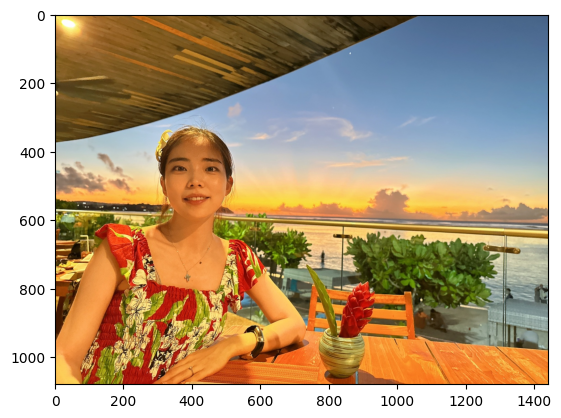

In [43]:
face_pic = list(uploaded.keys())[1]
cat_whiskers = list(uploaded.keys())[0]

img_bgr = cv2.imread(face_pic)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)


In [44]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환


In [45]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)


rectangles[[(324, 407) (510, 593)]]


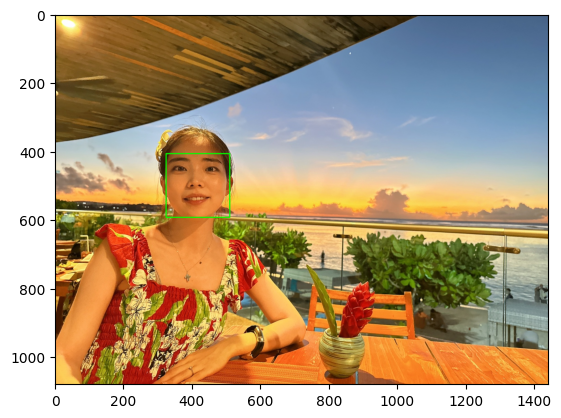

In [46]:
# 찾은 얼굴 영역 박스 리스트
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

rectangles[[(324, 407) (510, 593)]]


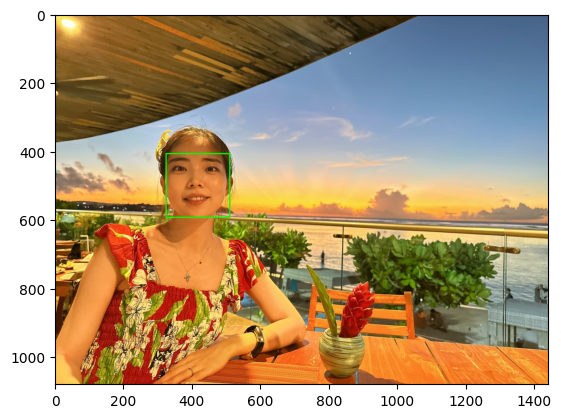

In [47]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [48]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

--2025-04-10 12:19:10--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-04-10 12:19:11--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2.1’

shape_predictor_68_ 100%[===================>]  61.07M  32.0MB/s    in 1.9s    

2025-04-10 12:19:13 (32.0 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2.1’ saved [64040097/64040097]

bzip2: Output file shape_predictor_68_face_landmarks.dat already exists.


In [49]:
model_path = 'shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

In [50]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


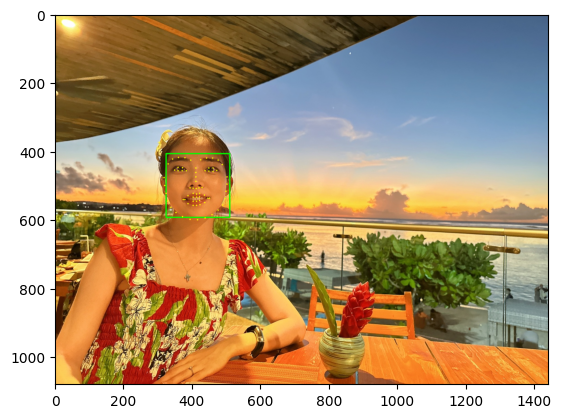

In [51]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [52]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33]) # 코 아래쪽 index는 33 입니다
    x = landmark[33][0] # 이미지에서 코 부위의 x값
    y = landmark[33][1] + dlib_rect.height()//2 # 이미지에서 코 부위의 y값 + 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (412, 509-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(412, 509)
(x,y) : (412,602)
(w,h) : (187,187)


In [53]:
img_sticker = cv2.imread(cat_whiskers) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 이미지의 차원 확인


(187, 187, 3)


In [54]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 코 부위의 x값 = 412
# y는 이미지에서 코 부위의 y값 = 509
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 187
# h는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 187
refined_x = x - w // 2 # 412 + (187//2) = 412+93 = 505
refined_y = y - h # 602-187 = 415
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (319,415)


In [55]:
# 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# 음수값 만큼 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 이미지를 씌우기 위해 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (319,415)


In [56]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 입니다.
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)


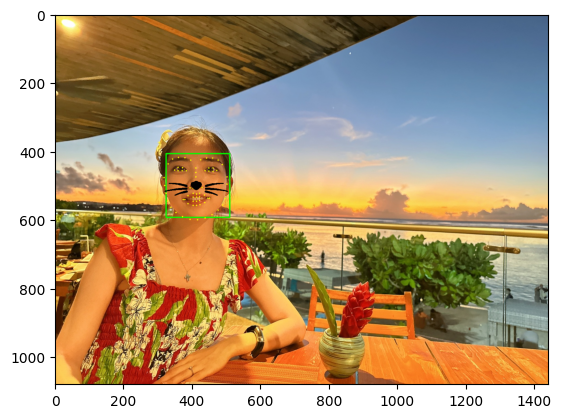

In [57]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

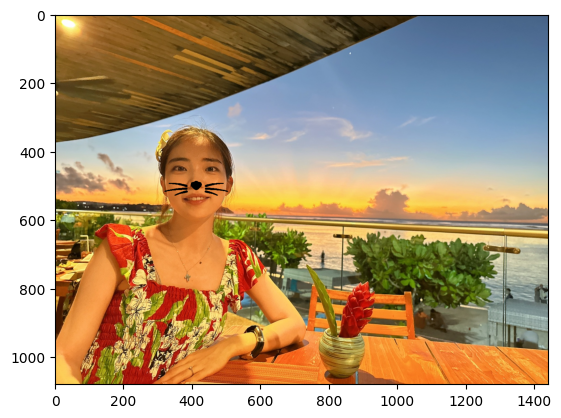

In [58]:

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### **45도 각도로 위를 바라본 다른 샘플 사진으로 진행해보았다.**
- 68개의 점이 나름 눈코입을 잘 지정했다. 아마 눈이 두개, 코가 한개, 입이 한개 모두 나와있어서 성공한것 같다.
- 하지만 스티커는 회전이 되지 않기 때문에 그 위에 부자연스럽게 얹어졌다.
- 기준 사진이 얼굴크기가 작은 사진이어서 해당 샘플은 얼굴크기가 큰 사진을 썼는데, 큰 사이즈의 얼굴은 크게 영향을 미치는 것 같지 않다.

rectangles[[(76, 461) (461, 846)]]


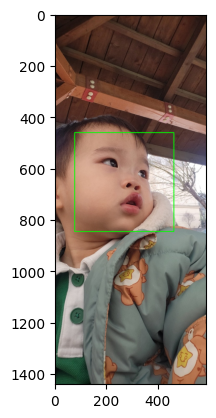

In [59]:

sample_pic = list(uploaded.keys())[2]
img_bgr_sample = cv2.imread(sample_pic)    # OpenCV로 이미지를 불러옵니다
img_show_sample = img_bgr_sample.copy()      # 출력용 이미지를 따로 보관합니다
img_rgb_sample = cv2.cvtColor(img_bgr_sample, cv2.COLOR_BGR2RGB)
dlib_rects_sample = detector_hog(img_rgb_sample, 1)   # (image, num of image pyramid)
print(dlib_rects_sample)

for dlib_rect_sample in dlib_rects_sample: # 찾은 얼굴 영역의 좌표
    l = dlib_rect_sample.left() # 왼쪽
    t = dlib_rect_sample.top() # 위쪽
    r = dlib_rect_sample.right() # 오른쪽
    b = dlib_rect_sample.bottom() # 아래쪽

    cv2.rectangle(img_show_sample, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_sample_show_rgb =  cv2.cvtColor(img_show_sample, cv2.COLOR_BGR2RGB)
plt.imshow(img_sample_show_rgb)
plt.show()


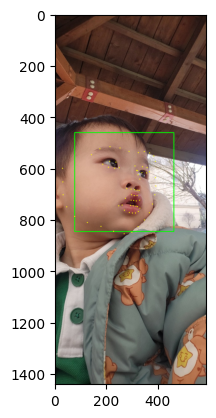

In [60]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect_sample in dlib_rects_sample:
    points = landmark_predictor(img_rgb_sample, dlib_rect_sample)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show_sample, point, 2, (0, 255, 255), -1)

img_sample_show_rgb = cv2.cvtColor(img_show_sample, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_sample_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

(309, 683)
(386, 386, 3)
(x,y) : (116,490)


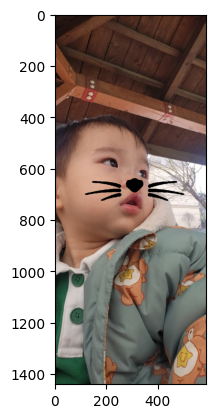

In [62]:
for dlib_rect_sample, landmark in zip(dlib_rects_sample, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33]) # 코 아래쪽 index는 33 입니다
    x = landmark[33][0] # 이미지에서 코 부위의 x값
    y = landmark[33][1] + dlib_rect_sample.height()//2 # 이미지에서 코 부위의 y값 + 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (412, 509-(186+1//2))
    w = h = dlib_rect_sample.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수

img_sticker = cv2.imread(cat_whiskers) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환

img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 이미지의 차원 확인

refined_x = x - w // 2
refined_y = y - h
print (f'(x,y) : ({refined_x},{refined_y})')

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)


sticker_area = img_bgr_sample[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr_sample[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr_sample, cv2.COLOR_BGR2RGB))
plt.show()


### **45도 각도로 위를 바라본 다른 샘플 사진으로 진행해보았다.**
#- 68개의 점이 나름 눈코입을 잘 지정했다. 아마 눈이 두개, 코가 한개, 입이 한개 모두 나와있어서 성공한것 같다.
#- 하지만 스티커는 회전이 되지 않기 때문에 그 위에 부자연스럽게 얹어졌다.
#- 기준 사진이 얼굴크기가 작은 사진이어서 해당 샘플은 얼굴크기가 큰 사진을 썼는데, 큰 사이즈의 얼굴은 크게 영향을 미치는 것 같지 않다.

## 회고
#배운점 : 스티커가 있는 이미지를 따로 잘라내어 붙인 부분이 신기했다.
#아쉬운점 : addweight 구현을 하지 못한 부분이 아쉽다
#느낀점 : 코드에 대한 구성을 더 확실히 인지하고 다양하게 활용할 수 있었으면 좋겠다. 스티커도 회전이 잘 될 수 있는 방법을 찾고싶다.


## 회고
배운점 : 스티커가 있는 이미지를 따로 잘라내어 붙인 부분이 신기했다.

아쉬운점 : addweight 구현을 하지 못한 부분이 아쉽다

느낀점 : 코드에 대한 구성을 더 확실히 인지하고 다양하게 활용할 수 있었으면 좋겠다. 스티커도 회전이 잘 될 수 있는 방법을 찾고싶다.